In [2]:
#import data into pandas dataframe

#add matplot lib inline magic command
%matplotlib inline

#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#read csv files into dataframe
city_data_df=pd.read_csv("Resources/city_data.csv")
ride_data_df=pd.read_csv("Resources/ride_data.csv")


In [3]:
#merge dataframes

#before merging, the dataframes need to be inspected to ensure there is no incorrect data

#city_data_df
#get all rows that are not null
city_data_df.count()
city_data_df.isnull().sum()

#make sure driver_count column in the city_data_df has an integer data type
#gets Data Type (dtype) for only the driver_count column:
#city_data_df["driver_count"].dtypes
#gets data types for all columns
city_data_df.dtypes

#find out how many data points there are for each type of city
city_types=city_data_df["type"].unique()
print(city_types)
city_type_size={}
for itype in city_types:
    city_type_size[itype]=sum(city_data_df["type"]==itype)
city_type_size

['Urban' 'Suburban' 'Rural']


{'Urban': 66, 'Suburban': 36, 'Rural': 18}

In [4]:
#inspect ride data dataframe
#get rows that contain null values
ride_data_df.isnull().sum()

#make sure the fare and ride id columns are numberical data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [5]:
#merge the dataframes. both data frames contain a city column, so merge them on city

#combine data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#display dataframe
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [6]:
#merge the dataframes. both data frames contain a city column, so merge them on city

#combine data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#display dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
#create bubble chart that shows avg fare vs total number of rides, 
#with bubble size being the average number of drivers for each city type

#Create the Urban city Dataframe
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

#create subrubad city dataframe
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]

#create rural city df
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [8]:
#total number of rides from each city in each city type
urban_ride_count=urban_cities_df.groupby("city").count()["ride_id"]

suburban_ride_count=suburban_cities_df.groupby("city").count()["ride_id"]

rural_ride_count=rural_cities_df.groupby("city").count()["ride_id"]



In [9]:
#calculate the average city fare for each city type

urban_avg_fare=urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare=suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare=rural_cities_df.groupby("city").mean()["fare"]

In [10]:
#average number of drivers for each city type
urban_driver_count=urban_cities_df.groupby("city").mean()["driver_count"]
suburban_driver_count=suburban_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

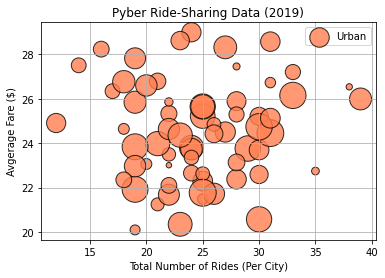

In [11]:
#plt.plot(urban_ride_count, urban_avg_fare, "o", markersize=urban_driver_count)
#build scatter plot for urban cities
plt.scatter(
    urban_ride_count, urban_avg_fare, label="Urban", 
    s=[i*10 for i in urban_driver_count], edgecolor="black", linewidth=1, 
    alpha=0.8, color="coral")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avgerage Fare ($)")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.legend()
plt.grid(True)

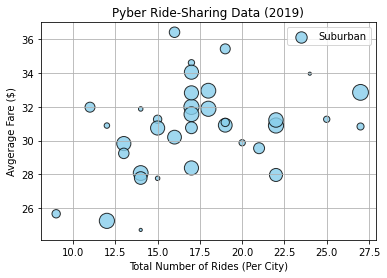

In [12]:
#build scatter plot for surburban cities
plt.scatter(
    suburban_ride_count, suburban_avg_fare, label="Suburban", 
    s=[i*10 for i in suburban_driver_count], edgecolor="black", linewidth=1, 
    alpha=0.8, color="skyblue")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avgerage Fare ($)")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.legend()
plt.grid(True)


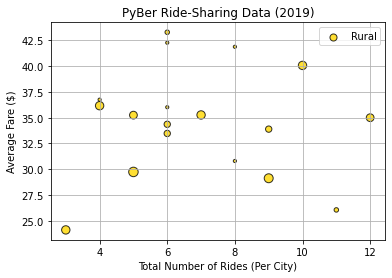

In [13]:
# Build the scatter plots for suburban cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

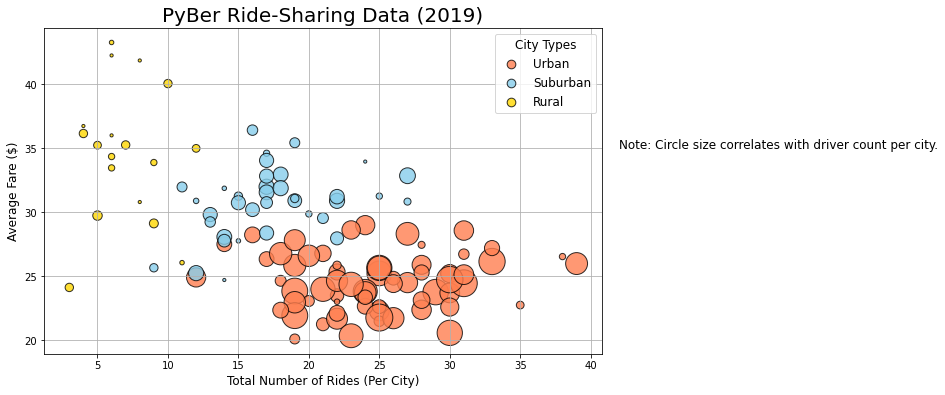

<Figure size 432x288 with 0 Axes>

In [14]:
#put all scatter plots onto one figure
plt.subplots(figsize=(10, 6))

#Urban
plt.scatter(
    urban_ride_count, urban_avg_fare, label="Urban", 
    s=[i*10 for i in urban_driver_count], edgecolor="black", linewidth=1, 
    alpha=0.8, color="coral")

#Suburban
plt.scatter(
    suburban_ride_count, suburban_avg_fare, label="Suburban", 
    s=[i*10 for i in suburban_driver_count], edgecolor="black", linewidth=1, 
    alpha=0.8, color="skyblue")

#Rural
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

#Add title and axes labels
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)

#Add grid
plt.grid(True)

# Add the legend. and format legend
lgnd=plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
#plt.legend()

#Add note to right of the chart. 42 is the x coordinate, 35 is the y coordinate for where the textbox will be (based on chart axes)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#display
plt.show()

#save the figure
plt.savefig("analysis/Fig1.png")

In [15]:
#PANDAS DESCRIBE FUNCTION
#dataframe.describe() returns count, mean, std dev, min value, 25%, 50%, and 75% percentiles, and max value for the dataframe 
#get summary statistics
urban_cities_df.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [16]:
suburban_cities_df.describe()


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [17]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [18]:
#get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [19]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [20]:
rural_ride_count.describe()


count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [21]:
#PANDAS MEAN, MEDIAN, AND MODE METHODS
#mean(), median*(), and mode()

#calculate the mean of the ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

#round(dataframe, 2) rounds the dataframe to 2 numbers after the decimal
#apparently you can just separate the values using comma and it will output them all in parenthesis, separated by commas ?

(24.62, 17.36, 6.94)

In [22]:
#calculate the mean ride count for each city type
urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [23]:
#calculate the mode of ride count for each city type (mode is value that shows up the most)
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [24]:
#Numpy mean() and mdian() functions and scipy mode() function. used when not in jupyter notebook

#import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts


In [25]:
#note: measures of central tendency is mean, median and mode

#calculate the measures of central tendency for the ride count for urban cities
mean_urban_ride_count=np.mean(urban_ride_count)
print(f"The mean for ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count=np.median(urban_ride_count)
print(f"The median for ride counts for urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count=sts.mode(urban_ride_count)
print(f"The mode for ride counts for urban trips is {mode_urban_ride_count}.")

The mean for ride counts for urban trips is 24.62.
The median for ride counts for urban trips is 24.00.
The mode for ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [26]:
mode_suburban_ride_count=sts.mode(suburban_ride_count)
print(f"The mode for ride counts for suburban trips is {mode_suburban_ride_count}.")

mode_rural_ride_count=sts.mode(rural_ride_count)
print(f"The mode for ride counts for rural trips is {mode_rural_ride_count}.")

The mode for ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mode for ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [27]:
#get the fares for the urban cities
urban_fares=urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [28]:
# calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares=np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares=np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}")

mode_urban_fares=sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [29]:
# calculate the mean for other city types
suburban_fares=suburban_cities_df["fare"]
rural_fares=rural_cities_df["fare"]

mean_suburban_fares=np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

# calculate the measures of central tendency for the average fare for the urban cities
mean_rural_fares=np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

The mean fare price for suburban trips is $30.97.
The mean fare price for rural trips is $34.62.


In [30]:
#get the driver count data from the urban cities
urban_drivers=urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [31]:
#calculate the measures of central tendency for driver count for urban cities using numpy7 and scipy modules
print("below is (mean, median, and mode). in that order")
mean_urban_drivers=np.mean(urban_drivers)
median_urban_drivers=np.median(urban_drivers)
mode_urban_drivers=sts.mode(urban_drivers)

print(f"{mean_urban_drivers:.2f}, {median_urban_drivers:.2f}, {mode_urban_drivers}")


below is (mean, median, and mode). in that order
36.68, 37.00, ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [32]:
#calculate the measures of central tendency for driver count for suburban cities using numpy7 and scipy modules

suburban_drivers=suburban_cities_df["driver_count"]
#suburban_drivers.head()


print("below is (mean, median, and mode). in that order")
mean_suburban_drivers=np.mean(suburban_drivers)
median_suburban_drivers=np.median(suburban_drivers)
mode_suburban_drivers=sts.mode(suburban_drivers)

print(f"{mean_suburban_drivers:.2f}, {median_suburban_drivers:.2f}, {mode_suburban_drivers}")

below is (mean, median, and mode). in that order
13.71, 16.00, ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [33]:
rural_drivers=rural_cities_df["driver_count"]

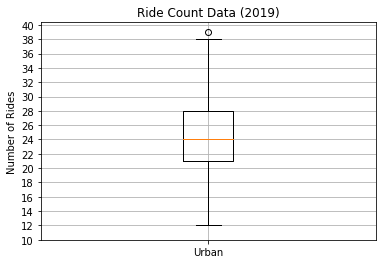

In [33]:
# create a box and whisker plot for the urban cities ride count

#create the x label for later
x_labels=["Urban"]

#create the figure and axes
fig, ax = plt.subplots()

#assign a boxplot of the urban_ride_count to the axis, and assign the x_labels to the labels
ax.boxplot(urban_ride_count, labels=x_labels)

#add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [34]:
#plot above description
#median is red line in middle of box. 12
#box represents std dev. std dev is about 5
#the minimum is 12
#outlier and max value is 39

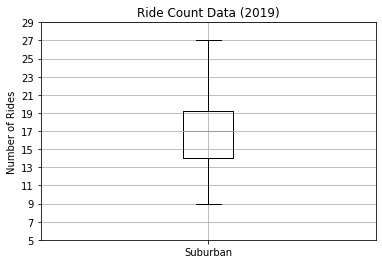

In [35]:
#making box and whisker plots for suburban
x_label=["Suburban"]

#create figure
fig, ax=plt.subplots()

#add box and whisker plot to the axis
ax.boxplot(suburban_ride_count, labels=x_label)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(5, 30, step=2.0))
ax.grid()

plt.show()

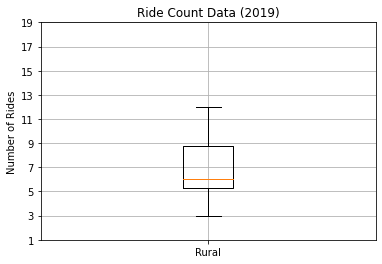

In [36]:
#for rural

x_label=["Rural"]

fig, ax=plt.subplots()

ax.boxplot(rural_ride_count, labels=x_label)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(1, 21, step=2.0))
ax.grid()

plt.show()

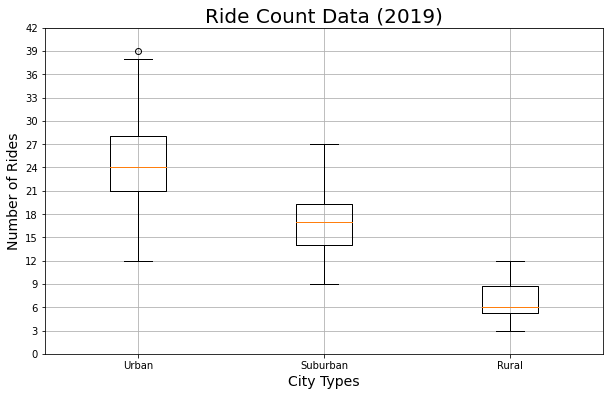

In [37]:
#add all ride count box and whisker plots to the same graph

#create variable for xlabels and a new dataframe for ridecount for all cities
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]

#create the figure and axis on the plot. change the figure size
fig, ax=plt.subplots(figsize=(10, 6))

#create title and axes labels
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)

#create the box plot
ax.boxplot(ride_count_data, labels=x_labels)

#make ticks and show grid
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

#save the figure and show
plt.savefig("analysis/Fig2.png")
plt.show()

In [38]:
#From the plot, we can see that Urban has an outlier at 39. From this, we can find the city that has highest rider count
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


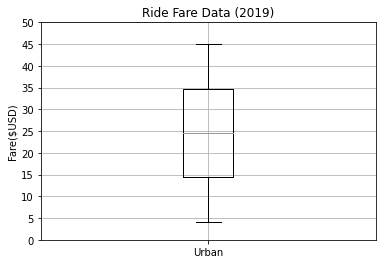

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [39]:
#create a box and whisker plot for the urban fare data

#create label and plot
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

#add title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

#show plot and print the summary statistics
plt.show()
print("Summary Statistics")
urban_fares.describe()

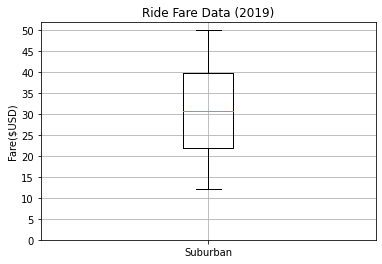

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [40]:
#create a box and whisker plot for the suburban fare data

#create label and plot
x_labels=["Suburban"]
fig, ax=plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

#add title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

#show plot and print the summary statistics
plt.show()
print("Summary Statistics")
urban_fares.describe()

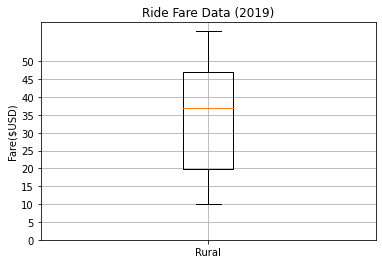

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [41]:
#create a box and whisker plot for the rural fare data

#create label and plot
x_labels=["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

#add title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

#show plot and print the summary statistics
plt.show()
print("Summary Statistics")
urban_fares.describe()

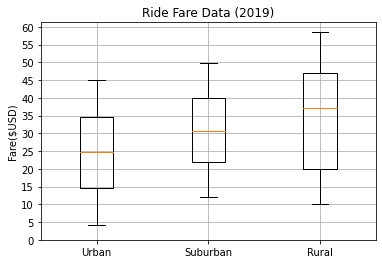

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [42]:
#create a box and whisker plot for the urban fare data

#create label and plot
x_labels=["Urban", "Suburban", "Rural"]
fares_all=[urban_fares, suburban_fares, rural_fares]
fig, ax=plt.subplots()
ax.boxplot(fares_all, labels=x_labels)

#add title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()

#show plot and print the summary statistics
plt.show()
print("Summary Statistics")
urban_fares.describe()

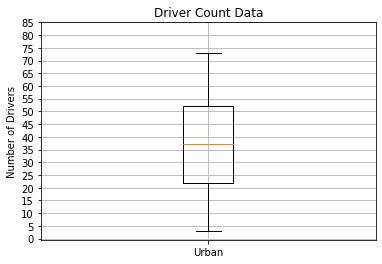

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [43]:
#create box and whiker for urban_drivers count data
xlabel=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_drivers, labels=xlabel)

ax.set_title("Driver Count Data")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))

ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

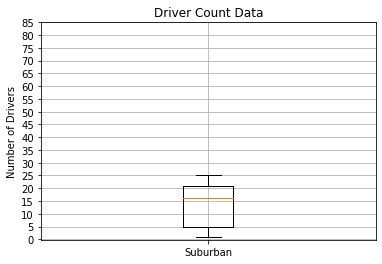

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [44]:
#create box and whiker for suburban_drivers count data
xlabel=["Suburban"]
fig, ax=plt.subplots()
ax.boxplot(suburban_drivers, labels=xlabel)

ax.set_title("Driver Count Data")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))

ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

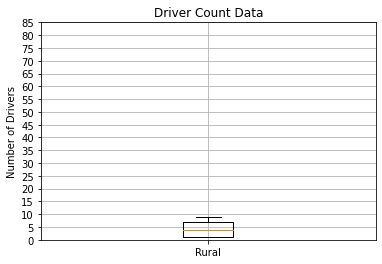

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [45]:
#create box and whiker for rural_drivers count data
xlabel=["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_drivers, labels=xlabel)

ax.set_title("Driver Count Data")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))

ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

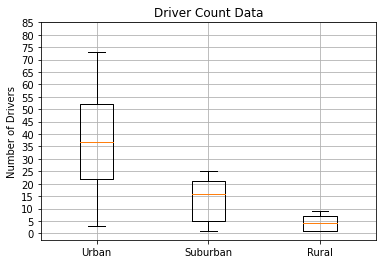

In [46]:
#create box and whiker for all drivers count data
xlabel=["Urban", "Suburban", "Rural"]
all_drivers=[urban_drivers, suburban_drivers, rural_drivers]
fig, ax=plt.subplots()
ax.boxplot(all_drivers, labels=xlabel)

ax.set_title("Driver Count Data")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))

ax.grid()
plt.show()


In [47]:
#get the sum of the fares for each city type
sum_fares_by_type=pyber_data_df.groupby("type").sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [48]:
#Get the sum of all the fares
total_fares=pyber_data_df["fare"].sum()
total_fares

63538.64

In [49]:
#calculate the percentage off are for each city type
type_percents=100*sum_fares_by_type/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

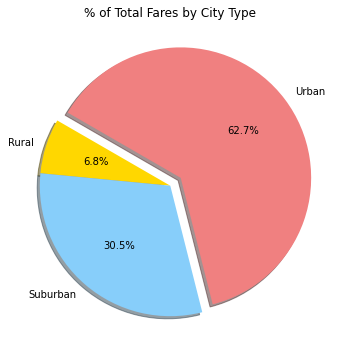

In [50]:
#Import mpl to change plot configs using rcParams
import matplotlib as mpl

#Build the percentage of fares by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"], 
       explode=[0, 0, 0.1],
       autopct="%1.1f%%",
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

#change default font size
mpl.rcParams["font.size"]=14

#save figure
plt.savefig("analysis/Fig5.png")

#show figure
plt.show()

In [51]:
#total number of rides for each city type
per_type_rides=pyber_data_df.groupby("type").count()["ride_id"]

#total number of rides in all cities
all_rides=pyber_data_df.count()["ride_id"]

#percentage for each city type
ride_percents=per_type_rides/all_rides*100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

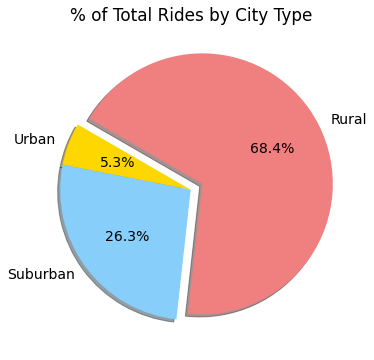

In [52]:
#create pie chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents, labels=["Urban", "Suburban", "Rural"],
       colors=["gold", "lightskyblue", "lightcoral"], 
       explode=[0, 0, 0.1], 
       autopct="%1.1f%%", 
       shadow=True, 
       startangle=150)

mpl.rcParams["font.size"]=14
plt.title("% of Total Rides by City Type")

plt.savefig("analysis/Fig6.png")

plt.show()

In [73]:
pyber_data_df

#get the number of drivers by city type
driver_count_per_city=pyber_data_df.groupby("type").sum()["driver_count"]

#total number of drivers (all cities)
driver_count_all=driver_count_per_city.sum()

#percent of drivers of each city type
driver_percents=driver_count_per_city/driver_count_all*100
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

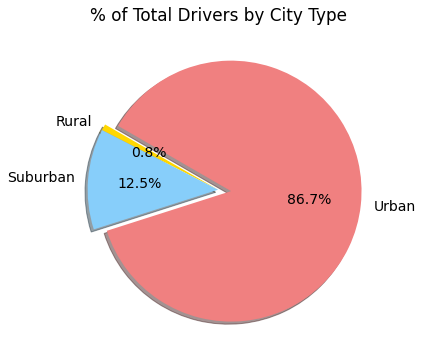

In [74]:
#create the pie chart

#figure size
plt.subplots(figsize=(10, 6))

#data in the chart
plt.pie(driver_percents,
       labels=["Rural", "Suburban", "Urban"], 
       colors=["gold", "lightskyblue", "lightcoral"], 
       autopct="%1.1f%%", 
       explode=[0, 0, 0.1], 
       startangle=150, 
       shadow=True)

#labels and titles etc
plt.title("% of Total Drivers by City Type")
mpl.rcParams["font.size"]=14

